<a href="https://colab.research.google.com/github/Stronglight0627/PilGi/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history=model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])


4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                           

In [2]:
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [5]:
conv = model.layers[0]
#weight와 bias 시각화
print(conv.weights[0].shape, conv.weights[1].shape) 

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

(3, 3, 1, 32) (32,)
-0.014354338 0.2167014


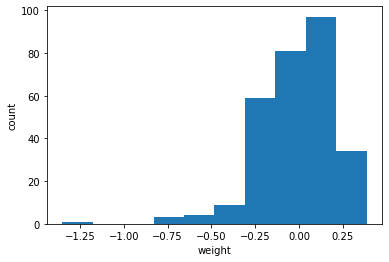

In [6]:
#
#학습된 신경망 가중치 시각화

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

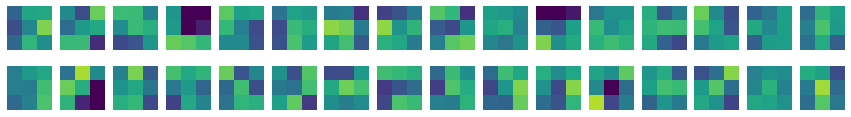

In [28]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
-0.01061354 0.085879594


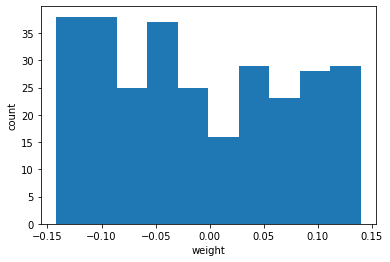

In [10]:
#
#학습되지 않은 신경망 가중치 시각화

N_model = keras.Sequential()
N_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

N_training_conv = N_model.layers[0]
print(N_training_conv.weights[0].shape)

N_training_weights = N_training_conv.weights[0].numpy()
print(N_training_weights.mean(), N_training_weights.std())

plt.hist(N_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

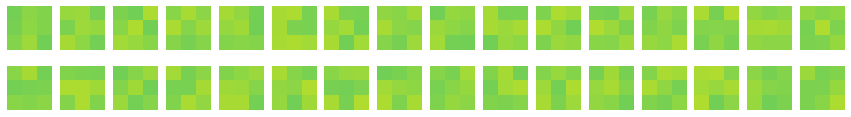

In [30]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(N_training_weights[:,:,0, i*16 + j], vmin=-2.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

1/1 [==============================] - 0s 48ms/step
(1, 28, 28, 32)


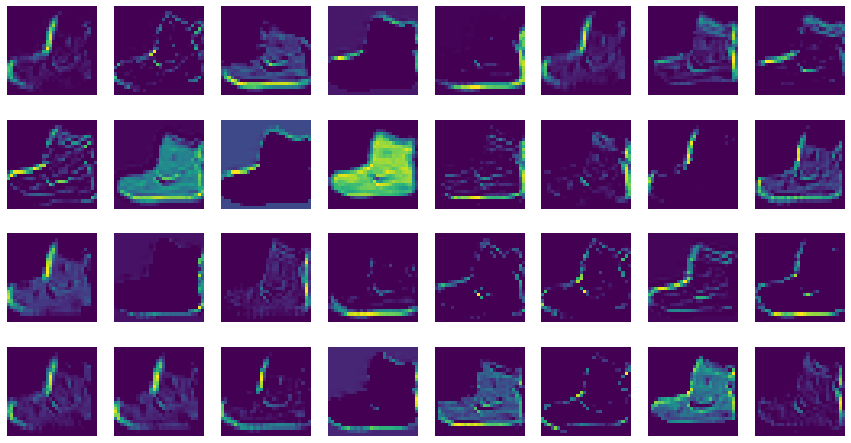

In [34]:
#첫번째 합성곱층의 특성맵 시각화

conv_first = keras.Model(model.input, model.layers[0].output)

inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_first.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()


1/1 [==============================] - 0s 62ms/step
(1, 14, 14, 32)


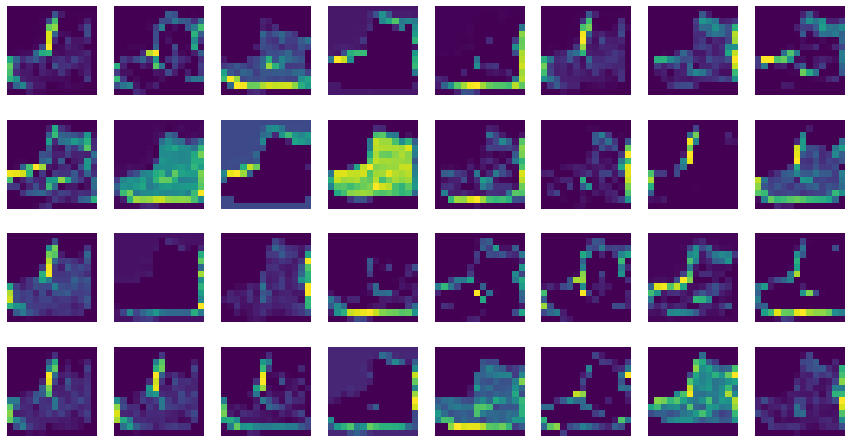

In [37]:
conv_sec = keras.Model(model.input, model.layers[1].output)

feature_maps = conv_sec.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

1/1 [==============================] - 0s 175ms/step
(1, 14, 14, 64)


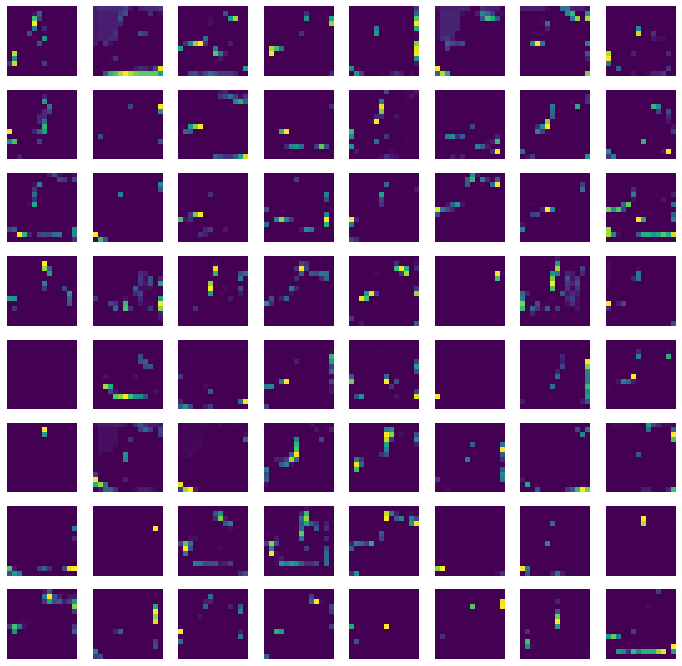

In [35]:
conv_sec = keras.Model(model.input, model.layers[2].output)

feature_maps = conv_sec.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()